In [1]:
%load_ext line_profiler
%load_ext autoreload
%autoreload 2

In [2]:
import pickle as pkl

import torch
import numpy as np
from matplotlib import pyplot as plt

from mtt.visualize import plot_mtt
from mtt.simulator import Simulator
from mtt.sensor import Sensor
from mtt.data import OnlineDataset, generate_data

rng = np.random.default_rng()

In [3]:
online_dataset = OnlineDataset(n_steps=100, sigma_position=10, length=20, img_size=128, device="cuda")
dataset = list(online_dataset)

In [4]:
positions = [info[-1]["target_positions"] for *_, info in dataset]
n_targets = np.zeros(len(positions))
for i, pos in enumerate(positions):
    n_targets[i] = (np.abs(pos) < 500).all(axis=1).sum(axis=0)
print(f"# of targets: mean = {np.mean(n_targets):0.2f}, std = {np.std(n_targets):0.2f}")
print(f"position std: {np.std(np.concatenate(positions), axis=0)}")

# of targets: mean = 11.38, std = 2.76
position std: [1399.4739 1264.8743]


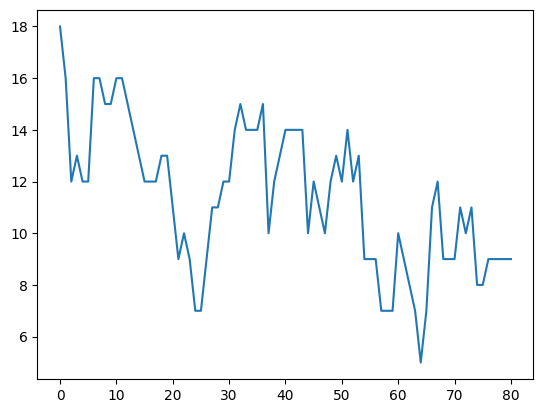

In [5]:
plt.plot(n_targets)

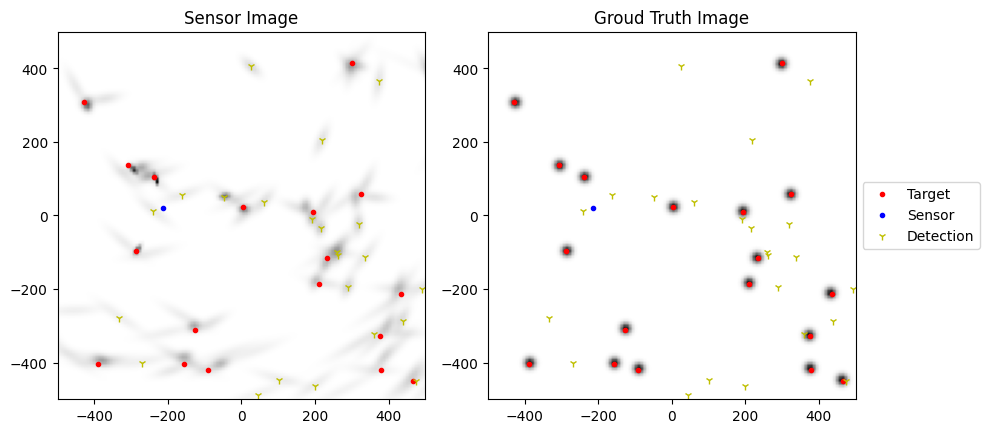

In [6]:
plot_mtt(dataset[0][0].cpu().numpy(), dataset[0][1].cpu().numpy(), dataset[0][2])
plt.show()